In [1]:
# DRAW SURFACE DENSITY OF NEMO MODEL ON MAP PROJECTION

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import scipy.io as io
import gsw
import xarray as xr

In [11]:
# DATA LOCATION
# Point to location where NEMO netcdf file is held
rootdir = '/home/ocean1/DRAKKAR/ORCA025.L75-GJM189-S/'
yr = '2015'
t = 'y'+yr+'m03d2*'
filename = yr+'/ORCA025.L75-GJM189_'+t+'_gridT.nc'

In [12]:
# LOAD DATA
data=xr.open_mfdataset(rootdir+filename,chunks={'x': 500, 'y': 500})
# Calculate surface density and take average through time
var=gsw.rho_xarray(data.vosaline.isel(deptht=0),data.votemper.isel(deptht=0),0).mean('time_counter')
print var

<xarray.DataArray (y: 1021, x: 1442)>
dask.array<mean_ag..., shape=(1021, 1442), dtype=float64, chunksize=(500, 500)>
Coordinates:
    deptht   float32 0.50576
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...


CPU times: user 160 ms, sys: 10 ms, total: 170 ms
Wall time: 172 ms


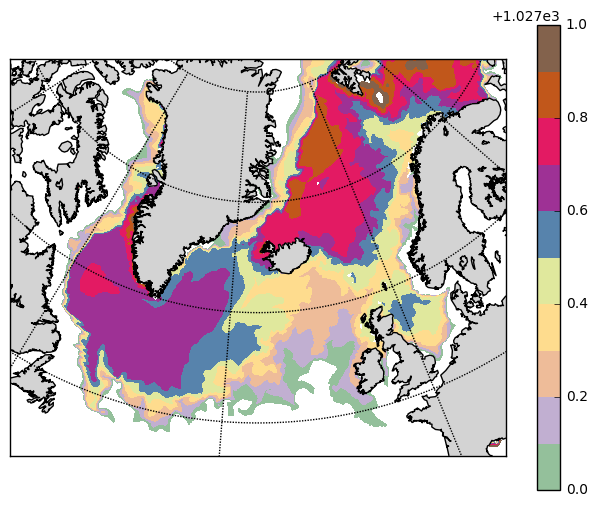

In [15]:
# PLOT
vmin = 1027
vmax = 1028
levels = np.arange(vmin,vmax+0.1,0.1)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#map1 = Basemap(projection='stere',width=9000000,height=6000000,lat_ts = 60, lat_0 = 60, lon_0=-45,resolution='l')
#map1 = Basemap(projection='omerc',height=8000000,width=12000000, resolution='l',area_thresh=1000.,lon_0=-45,lat_0=45,lon_2=-45,lat_2=80,lon_1=-45,lat_1=-20)
map1 = Basemap(width=5000000,height=4000000,
            resolution='l',projection='eqdc',\
            lat_1=60,lat_2=65,lat_0=65,lon_0=-25)

map1.fillcontinents(color='lightgrey',lake_color='lightgrey')
map1.drawcoastlines()

map1.drawparallels(np.arange(40,80,10))
map1.drawmeridians(np.arange(-180,180,30));
x,y = map1(data.nav_lon.isel(time_counter=0).values,data.nav_lat.isel(time_counter=0).values)

%time pc = map1.contourf(x,y,var,levels=levels,cmap=plt.cm.Accent)
cb = plt.colorbar(pc,ax=ax);

# SAVE FIGURE
#plt.savefig('/Volumes/ocean2/graemem/arctic_carbon/figures/contourf_MDT_arctic.eps',transparent=True)